<a href="https://colab.research.google.com/github/ssanudo/ProcesamDigImagTP/blob/main/PDItp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:

#Abro la img en PNG como un arreglo
im = imageio.imread('PrIm1.png')

print('Tamaño del arreglo',im.shape, 'donde', im.shape[0], 'x',im.shape[1],'es el tamaño de la imágen en píxeles, y ',im.shape[2], 'es el valor RGB de cada uno de dichos píxeles' )



Tamaño del arreglo (768, 623, 3) donde 768 x 623 es el tamaño de la imágen en píxeles, y  3 es el valor RGB de cada uno de dichos píxeles


In [ ]:
def MuestraRGB(y,x):
  imShowSelectedPixel=im.copy()
  print('PixAncho=',x,'PixAlto= ',y)
  for i in range(3,20):
    for j in range(2,20):
      if (x+i<=im.shape[1])and (y-j>=0):imShowSelectedPixel[y-j,x+i]=(52, 235, 207)
      if (x+i<=im.shape[1])and (y-j>=0):imShowSelectedPixel[y-j,x+i]=(52, 235, 207)
      if (x+i<=im.shape[1])and (y+j<=im.shape[0]):imShowSelectedPixel[y+j,x+i]=(52, 235, 207)
      #if (x-i)<=im.shape[1]:
        #print('entra i=',i,'x-i=',x-i,' y-j=',y-j,'y+j=',y+j)
      if (x-i>=0)and (y-j>=0):imShowSelectedPixel[y-j,x-i]=(52, 235, 207)
      if (x-i>=0)and (y+j<=im.shape[0]):imShowSelectedPixel[y+j,x-i]=(52, 235, 207)
      #else:print('no entra i=',i,'x-i=',x-i,' y-j=','y+j=',y+j)
  for i in range(3):
    for j in range(3):          
      if (x+i<im.shape[1])and (y-j>=0):imShowSelectedPixel[y-j,x+i]=im[y,x]
      if (x+i<im.shape[1])and (y+j<im.shape[0]):imShowSelectedPixel[y+j,x+i]=im[y,x]
      #if (x-i)<=im.shape[1]:
      if (x-i>=0)and (y-j>=0):imShowSelectedPixel[y-j,x-i]=im[y,x]
      if (x-i>=0)and (y+j<im.shape[0]):imShowSelectedPixel[y+j,x-i]=im[y,x]
  
  print('Así se vé el pixel [',y,',',x,'] (ubicado dentro del cuadrado cian) que contiene ',im[y,x][0],'Red, ',im[y,x][1],' Green, y ',im[y,x][2],' Blue.')
  fig = plt.figure(figsize=(10, 20))
  fig.add_subplot(1, 2, 2)
  plt.imshow([[im[y,x]]])
  fig.add_subplot(1, 2, 1)
  plt.imshow(imShowSelectedPixel)
  plt.show()

En alto: 301
En ancho: 430
PixAncho= 430 PixAlto=  301
Así se vé el pixel [ 301 , 430 ] (ubicado dentro del cuadrado cian) que contiene  229 Red,  208  Green, y  189  Blue.


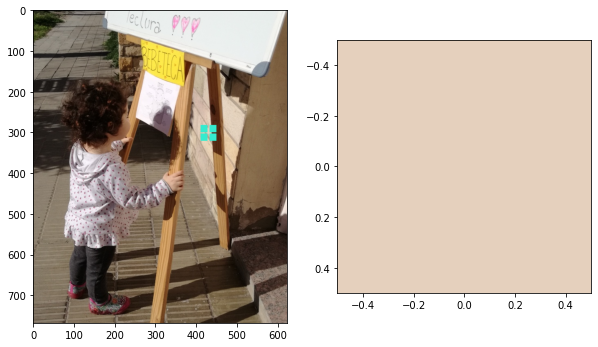

In [ ]:
#@title ## Obtención de RGB de una imágen
#@markdown  Seleccione el lugar de la imágen cuyo RGB desea obtener
ImgHeight=im.shape[0]
ImgWidth=im.shape[1]
PixelX = 430 #@param {type:"slider", min:0, max:622, step:1}
PixelY = 301 #@param {type:"slider", min:0, max:767, step:1}


print('En alto:',PixelY)
print('En ancho:',PixelX)
MuestraRGB(PixelY,PixelX)

In [ ]:
def normalizeRGB(x):
    """
    Normaliza el valor RGB de la imagen en el rango [0,1]
    : x: Lista de RGB  de la imágen
    """
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

#Defino las matrices de conversión, de RGB a YIQ y viseversa.
rgb2yiq=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
print(rgb2yiq)
yiq2rgb=np.array([[1,0.9663,0.621],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
print(yiq2rgb)

[[ 0.299     0.587     0.114   ]
 [ 0.595716 -0.274453 -0.321263]
 [ 0.211456 -0.522591  0.311135]]
[[ 1.      0.9663  0.621 ]
 [ 1.     -0.2721 -0.6474]
 [ 1.     -1.107   1.7046]]


In [ ]:
imNorm=normalizeRGB(im)
Arr_YIQ=np.dot(imNorm, rgb2yiq.T)

In [ ]:
imNorm=normalizeRGB(im)
#Obtengo valores de YIQ 
Arr_YIQ=np.dot(imNorm, rgb2yiq.T)

#Chequeo las dimensiones y rangos de YIQ

print(Arr_YIQ.shape)
Arr_YIQ.shape
print('Ymin=',Arr_YIQ[0].min())
print('Ymax=',Arr_YIQ[0].max())
print('Imin=',Arr_YIQ[1].min())
print('Imax=',Arr_YIQ[1].max())
print('Qmin=',Arr_YIQ[2].min())
print('Qmax=',Arr_YIQ[2].max())

(768, 623, 3)
Ymin= -0.024059290196078442
Ymax= 0.9794980392156862
Imin= -0.02405929019607844
Imax= 0.9716549019607843
Qmin= -0.024059290196078435
Qmax= 0.9873411764705883


In [ ]:

def ModifyYIQ(Arr_YIQ,alfa,beta)

  #modifico luminancia
  Arr_YIQmod=Arr_YIQ.copy()
  alfa=3
  Arr_YIQmod[:,:,0]=alfa*Arr_YIQmod[:,:,0]
  if (Arr_YIQmod[:,:,0].any()>=1):
      print('debe modificar alfa')

  beta=5
  Arr_YIQmod[:,:,1]=beta*Arr_YIQmod[:,:,1]
  Arr_YIQmod[:,:,2]=beta*Arr_YIQmod[:,:,2]
  if ((Arr_YIQmod[:,:,1].any()<=-0.5957)or(Arr_YIQmod[:,:,1].any()>=0.5957)or(Arr_YIQmod[:,:,2].any()<=-0.5226)or(Arr_YIQmod[:,:,2].any()>=0.5226)):
      print('Cambie el valor de beta')

  #Fuerzo los valores fuera de rango

  Arr_YIQmod[:,:,0][Arr_YIQmod[:,:,0]>=1]=1
  Arr_YIQmod[:,:,1][Arr_YIQmod[:,:,1]<-0.5957]=-0.5957
  Arr_YIQmod[:,:,1][Arr_YIQmod[:,:,1]>0.5957]=0.5957
  Arr_YIQmod[:,:,2][Arr_YIQmod[:,:,2]<-0.5226]=-0.5226
  Arr_YIQmod[:,:,2][Arr_YIQmod[:,:,2]>0.5226]=0.5226
  #print('Arr_YIQmod',Arr_YIQmod)
  #Vuelvo a RGB normalizado
  Arr_RGBmod=np.dot(Arr_YIQmod, yiq2rgb.T)
  #Desnormalizo
  Arr_RGBmod=Arr_RGBmod*255
  #Arr_RGBmod